#Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od



from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Load Dataset

In [33]:



# Download Mall Customers dataset
od.download("https://www.kaggle.com/datasets/shwetabh123/mall-customers")

# Load dataset into DataFrame (same style as you used before)
df = pd.read_csv("/content/mall-customers/Mall_Customers.csv")

# Quick check
print(df.head())
print(df.info())


Skipping, found downloaded files in "./mall-customers" (use force=True to force download)
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4)

#Select Features for Clustering

In [34]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

#Scale Features

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Find Optimal K (Elbow Method)

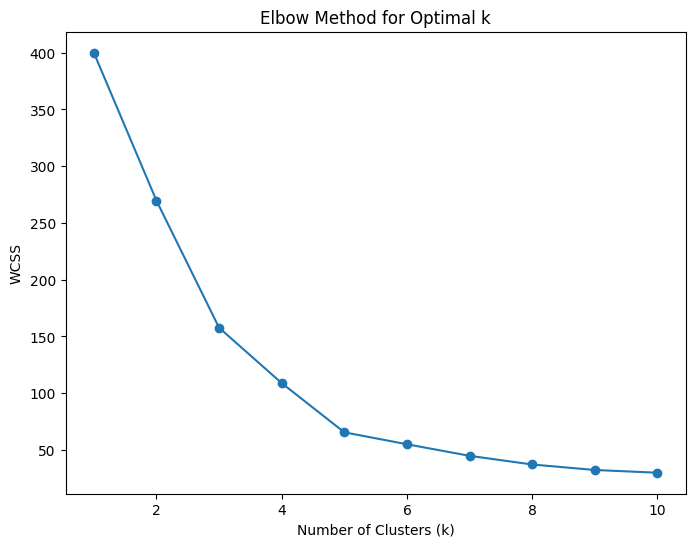

In [36]:
wcss = []  # within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

#Train KMeans with Optimal Clusters

In [37]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataset
df["Cluster"] = clusters

#Visualize Clusters

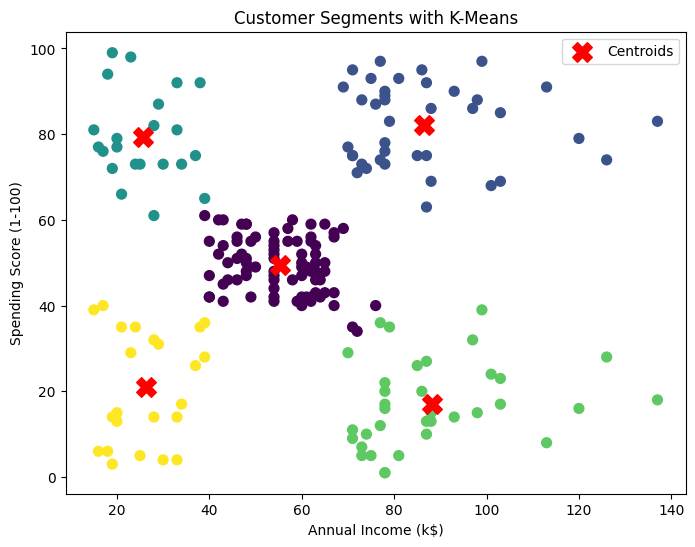

In [38]:
plt.figure(figsize=(8,6))

# Plot clusters
plt.scatter(
    X["Annual Income (k$)"],
    X["Spending Score (1-100)"],
    c=kmeans.labels_,
    cmap="viridis",
    s=50
)

# Plot centroids (rescale them back from StandardScaler)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    s=200,
    c="red",
    marker="X",
    label="Centroids"
)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments with K-Means")
plt.legend()
plt.show()

#DBSCAN clustering

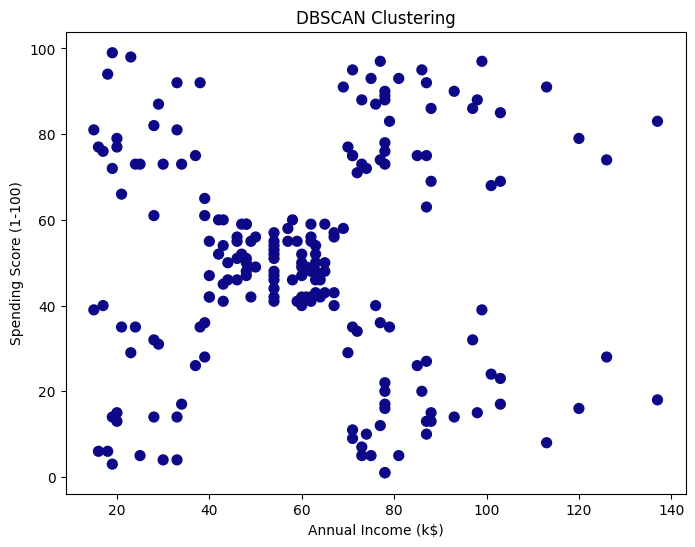

Average Spending Score per K-Means cluster:
KMeans_Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64

Average Spending Score per DBSCAN cluster:
DBSCAN_Cluster
0    50.2
Name: Spending Score (1-100), dtype: float64


In [39]:
dbscan = DBSCAN(eps=5, min_samples=5)   # tweak eps & min_samples for better results
db_labels = dbscan.fit_predict(X_scaled)

means = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Add both KMeans and DBSCAN labels to df
df["KMeans_Cluster"] = kmeans_labels
df["DBSCAN_Cluster"] = dbscan.labels_

# Plot DBSCAN clusters
plt.figure(figsize=(8,6))
plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"],
    c=db_labels,
    cmap="plasma",
    s=50
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering")
plt.show()

#  Analyze average spending per cluster
print("Average Spending Score per K-Means cluster:")
print(df.groupby("KMeans_Cluster")["Spending Score (1-100)"].mean())

print("\nAverage Spending Score per DBSCAN cluster:")
print(df.groupby("DBSCAN_Cluster")["Spending Score (1-100)"].mean())
